# 삼성전자 주가 예측 LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#삼성전자 주가 읽기
f = open("./data/01-삼성전자-주가.csv", 'r')
#파일 경로 지정
samsung = pd.read_csv(f, header = 0)
samsung_data = samsung.loc[1:250]
samsung_data

,Date,Closing Price,Open Price,High,Low,Volume
1,20200106,54900,55600,54600,55500,10278951
2,20200103,56000,56600,54900,55500,15422255
3,20200102,55500,56000,55000,55200,12993228
4,20191230,56200,56600,55700,55800,8356767
5,20191227,55700,56900,55500,56500,12313056
...,...,...,...,...,...,...
246,20190107,38000,38900,37800,38750,12748997
247,20190104,37450,37600,36850,37450,14108958
248,20190103,38300,38550,37450,37600,12471493
249,20190102,39400,39400,38550,38750,7847664


In [16]:
seq = samsung_data[['Closing Price']].to_numpy()#종가만 취한다. 
print("데이터 길이:", len(seq), '\n 앞쪽 5개 값:', seq[0:5])

데이터 길이: 9288 
 앞쪽 5개 값: [[55700]
 [54900]
 [56000]
 [55500]
 [56200]]


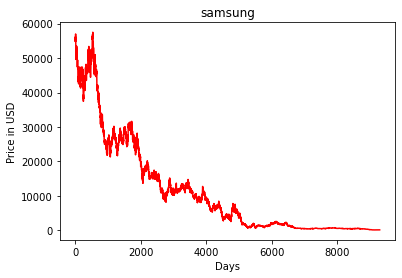

In [4]:
#그래프로 데이터 확인
plt.plot(seq, color = 'red')
plt.title('samsung')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

In [5]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq, window, horizon):
    X = []; Y= []
    for i in range(len(seq) - (window+horizon)+1):
        x = seq[i:(i+window)]
        y = (seq[i]+window+horizon-1)
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [6]:
w = 7 #윈도우 개수
h = 1 #수평선 개수

X,Y = seq2dataset(seq, w, h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [7]:
#훈련 집합과 테스트 집합으로 분할
split = int(len(X)*0.7)
x_train = X[0:split]; y_train = Y[0:split]
x_test = X[split:]; y_test = Y[split:]

In [9]:
#LSTM 모델 설계와 학습
model = Sequential()
model.add(LSTM(units = 128, activation = 'relu', input_shape = x_train[0].shape))
model.add(Dense(1))
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])
hist = model.fit(x_train, y_train, epochs =10, batch_size = 1, validation_data = (x_test, y_test), verbose = 2)

Epoch 1/10
6496/6496 - 21s - loss: 608.0731 - mae: 608.0731 - val_loss: 12.8802 - val_mae: 12.8802
Epoch 2/10
6496/6496 - 29s - loss: 404.0682 - mae: 404.0682 - val_loss: 15.3784 - val_mae: 15.3784
Epoch 3/10
6496/6496 - 29s - loss: 374.0833 - mae: 374.0833 - val_loss: 24.5122 - val_mae: 24.5122
Epoch 4/10
6496/6496 - 29s - loss: 374.4272 - mae: 374.4272 - val_loss: 8.0420 - val_mae: 8.0420
Epoch 5/10
6496/6496 - 29s - loss: 342.0207 - mae: 342.0207 - val_loss: 8.6978 - val_mae: 8.6978
Epoch 6/10
6496/6496 - 24s - loss: 318.6923 - mae: 318.6923 - val_loss: 11.0098 - val_mae: 11.0098
Epoch 7/10
6496/6496 - 23s - loss: 311.9427 - mae: 311.9427 - val_loss: 7.7701 - val_mae: 7.7701
Epoch 8/10
6496/6496 - 28s - loss: 288.2054 - mae: 288.2054 - val_loss: 14.2380 - val_mae: 14.2380
Epoch 9/10
6496/6496 - 29s - loss: 264.9944 - mae: 264.9944 - val_loss: 6.5933 - val_mae: 6.5933
Epoch 10/10
6496/6496 - 23s - loss: 265.8208 - mae: 265.8208 - val_loss: 7.0958 - val_mae: 7.0958


In [10]:
#LSTM 모델 평가
ev = model.evaluate(x_test, y_test, verbose = 0)
print("손실 함수:", ev[0], "MAE", ev[1])
ev

손실 함수: 7.095793724060059 MAE 7.095793724060059


[7.095793724060059, 7.095793724060059]

In [11]:
#lstm 모델로 예측 수행
pred = model.predict(x_test)
print("평균절댓값백분율오차(MAPE):", sum(abs(y_test-pred)/y_test)/len(x_test))

평균절댓값백분율오차(MAPE): [0.01484318]


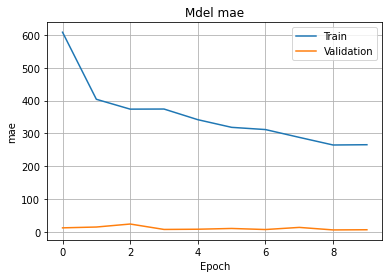

In [12]:
#학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Mdel mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
#plt.ylim([120,800])
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

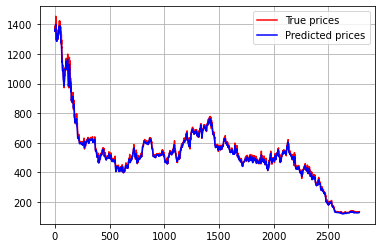

In [14]:
#예측 결과 시각화
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color = 'red')
plt.plot(x_range, pred[x_range], color = 'blue')
plt.legend(['True prices', 'Predicted prices'], loc = 'best')
plt.grid()
plt.show()